## Import Data

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization, MaxPool2D
import pickle
import sys
import cv2
import matplotlib.pyplot as plt
import gc # to delete used memory after running models

In [2]:
import sys
print(sys.executable)

C:\Users\alexc\AppData\Local\Programs\Python\Python310\python.exe


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1329842182251267832
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4185718784
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6887504791184553735
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


### Techniques to use: 

In [4]:
use_smote = False

In [5]:
use_data_augmentation = True

## Data Loading 

In [6]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [7]:
np.set_printoptions(threshold=10)
x[0:1]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state = 1)

In [9]:
#get the unique classes with set, and count them with len
K = len(set(y_train))
print("Unique classes: ", K)

Unique classes:  9


In [10]:
x_train.shape

(46201, 60, 60)

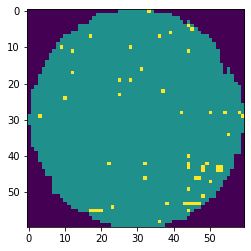

In [11]:
plt.imshow(x_train[100])
plt.show()

In [12]:
y

array([8, 8, 8, ..., 8, 8, 8], dtype=int64)

## Smote 

In [13]:
#Reshaping x_train to use Smote

In [14]:
from imblearn.over_sampling import SMOTE

if(use_smote):
    x_train_rows = len(x_train)
    x_train_rows
    x_train = x_train.reshape(x_train_rows,-1)
    x_train.shape
#----------------    
    x_train_rows = len(x_train)
    x_train = x_train.reshape(x_train_rows,-1)
    #Majority Class counts: 29360
#----------------   
    number_samples = 10000 #29360

    smote = SMOTE(sampling_strategy = {0:number_samples, 1:number_samples, 2:number_samples, 3:number_samples,
         4:number_samples, 5:number_samples, 6:number_samples, 7:number_samples, 8:29360}, random_state= 4)
    x_smote, y_smote = smote.fit_resample(x_train, y_train)
    
    print(x_smote.shape, x_smote[0].shape, y_smote.shape)
#----------------
    x_train = x_smote.reshape(-1,60,60)
    y_train = y_smote
    print(x_train.shape)

## Create Model

In [15]:
img_size = 60

i = Input(shape=(img_size,img_size,1))
x = Conv2D(32, (2,2), strides = 2, activation = "relu")(i)
x = Conv2D(64, (2,2), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x) #original layer but dropping this layer improves prediction?
#x = Conv2D(256, (3,3), strides = 2, activation = 'relu')(x)  # with this layer my prediction dropped 0.07 points
x = Flatten()(x)
x = Dropout(0.1)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.1)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

In [16]:
# from: https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
'''
img_size = 45

model = Sequential()
model.add(Conv2D(input_shape=(img_size,img_size,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(9, activation="softmax"))

model.summary()
'''

'\nimg_size = 45\n\nmodel = Sequential()\nmodel.add(Conv2D(input_shape=(img_size,img_size,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")

## Compile the Model

In [17]:
#Compile and fit the model

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 1)

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Data Augmentation 

In [18]:
#ImageDataGenerator requires 4 dimensions, including the color (greyscale or colored images)
if(use_data_augmentation):
    x_train = x_train.reshape(x_train.shape[0],img_size,img_size,1)

In [19]:
if(use_data_augmentation):
    batch_size = 16
    data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1,)
                                                                     #horizontal_flip = True, vertical_flip = True,)
                                                                     #rotation_range = 180,
                                                                     #fill_mode = 'constant')
    train_generator = data_generator.flow(x_train,y_train,batch_size)
    steps_per_epoch = x_train.shape[0]//batch_size # divided twice by batch_size?

## Fit the model 

In [20]:
#Used with the Data Augmentation segment:

if(use_data_augmentation):
    history = model.fit(train_generator, validation_data = [x_test, y_test], steps_per_epoch = steps_per_epoch, epochs = 50,
                 callbacks = [callback])
    
# 0.9189 val_accuracy

Epoch 1/50
2887/2887 [==============================] - 20s 6ms/step - loss: 0.3567 - accuracy: 0.8995 - val_loss: 0.2013 - val_accuracy: 0.9337
Epoch 2/50
2887/2887 [==============================] - 21s 7ms/step - loss: 0.2024 - accuracy: 0.9402 - val_loss: 0.1515 - val_accuracy: 0.9513
Epoch 3/50
2887/2887 [==============================] - 20s 7ms/step - loss: 0.1782 - accuracy: 0.9468 - val_loss: 0.1712 - val_accuracy: 0.9468
Epoch 4/50
2887/2887 [==============================] - 20s 7ms/step - loss: 0.1646 - accuracy: 0.9501 - val_loss: 0.1383 - val_accuracy: 0.9555
Epoch 5/50
2887/2887 [==============================] - 20s 7ms/step - loss: 0.1523 - accuracy: 0.9537 - val_loss: 0.1373 - val_accuracy: 0.9587
Epoch 6/50
2887/2887 [==============================] - 19s 7ms/step - loss: 0.1454 - accuracy: 0.9566 - val_loss: 0.1306 - val_accuracy: 0.9578
Epoch 7/50
2887/2887 [==============================] - 20s 7ms/step - loss: 0.1402 - accuracy: 0.9583 - val_loss: 0.1412 - val_ac

In [21]:
#Used normally without Data Augmentation Segment:

if(not use_data_augmentation):
    history = model.fit(#x,y,
                        x_train, y_train, validation_data = [x_test,y_test], 
                        epochs= 20, verbose = 1, callbacks=[callback], batch_size = 64)

## Graphing the accuracies and losses 

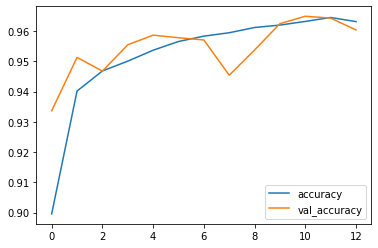

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

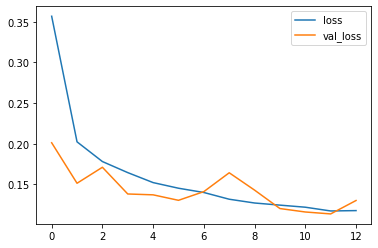

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

## Evaluating model with training data 

In [24]:
### The way to measure the model performance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def evaluation_measurement(y_valid, y_pred, num_classes=9, output_fig=False):
    fpr = {}
    tpr = {}
    thresh ={}
    mcauc = []
    for i in range(num_classes):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_valid, y_pred[:, i], pos_label=i)
        auc_score = roc_auc_score(y_valid, y_pred, multi_class = 'ovr')  #'ovr'
        mcauc.append(auc_score)

    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    
    print("MCAUC= ", np.mean(mcauc))
    
    if output_fig:
        plt.savefig('Multiclass ROC', dpi=300)

In [25]:
y_pred = model.predict(x_test)

MCAUC=  0.9916797416924624


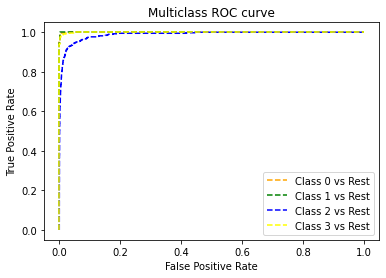

In [26]:
evaluation_measurement(y_test,y_pred)

In [27]:
y_test

array([8, 3, 8, ..., 8, 2, 8], dtype=int64)

In [28]:
y_pred

array([[3.4923474e-07, 3.7867412e-07, 2.0139436e-03, ..., 5.6288700e-04,
        9.8069477e-23, 9.9736637e-01],
       [0.0000000e+00, 0.0000000e+00, 1.6853609e-16, ..., 2.7614551e-24,
        0.0000000e+00, 2.5251876e-30],
       [2.4802899e-08, 1.1926909e-10, 2.5486478e-03, ..., 2.5918203e-05,
        2.7058592e-30, 9.9549073e-01],
       ...,
       [8.5909493e-09, 1.0339168e-12, 3.3393982e-07, ..., 1.7368898e-06,
        0.0000000e+00, 9.9998939e-01],
       [3.3037773e-07, 2.9299358e-09, 2.3051257e-01, ..., 3.2470220e-05,
        2.1825027e-21, 7.6117480e-01],
       [2.4867090e-06, 3.8559187e-06, 5.5956619e-04, ..., 6.4637646e-04,
        2.3054296e-23, 9.9819845e-01]], dtype=float32)

## Opening pickle with data for predictions 

In [29]:
pickle_in = open("x_to_predict.pickle","rb")
x_testing = pickle.load(pickle_in)

In [30]:
x_testing.shape

(118595, 60, 60)

In [31]:
x_testing

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Predictions

In [32]:
%%time
predictions = model.predict(x_testing)

CPU times: total: 8.09 s
Wall time: 6.57 s


In [33]:
len(predictions)

118595

In [34]:
predictions[0]

array([7.14250987e-08, 1.10404876e-07, 2.84733196e-05, 2.52462229e-09,
       4.24492609e-04, 5.99171453e-17, 1.37940384e-04, 1.13007810e-32,
       9.99408960e-01], dtype=float32)

## Uploading CSV 

In [35]:
#for uploading

import pandas as pd

pred_df = pd.DataFrame(predictions, columns = ["Type 0", "Type 1", "Type 2", "Type 3", "Type 4", "Type 5", "Type 6", "Type 7", "Type 8"])
#pred_df['Id'] = pred_df.reset_index().index

In [36]:
pred_df

,Type 0,Type 1,Type 2,Type 3,Type 4,Type 5,Type 6,Type 7,Type 8
0,7.142510e-08,1.104049e-07,0.000028,2.524622e-09,4.244926e-04,5.991715e-17,1.379404e-04,1.130078e-32,9.994090e-01
1,7.317093e-06,5.766011e-08,0.031352,5.974727e-03,1.253143e-05,1.194241e-10,2.393442e-05,5.074520e-23,9.626292e-01
2,4.164908e-11,2.376591e-10,0.000266,1.756417e-06,2.630776e-05,7.541371e-15,5.807188e-05,6.924331e-32,9.996482e-01
3,2.636828e-06,6.532205e-09,0.000336,1.165211e-08,1.812227e-05,6.911763e-13,4.423825e-04,2.606683e-30,9.992012e-01
4,2.770701e-05,3.330134e-09,0.000075,1.870221e-09,1.581923e-05,2.662960e-14,9.376989e-05,1.249890e-26,9.997873e-01
...,...,...,...,...,...,...,...,...,...
118590,1.304587e-09,1.058357e-12,0.924016,7.596330e-02,1.182038e-05,1.730394e-10,9.013770e-06,1.140897e-17,2.570078e-08
118591,1.818110e-08,4.613990e-12,0.937606,4.976106e-02,8.310339e-04,6.211073e-13,1.022820e-04,4.918719e-16,1.170004e-02
118592,1.588808e-13,3.452189e-19,0.000079,9.999206e-01,1.146718e-09,5.863581e-17,6.174285e-08,6.249115e-23,1.943810e-07
118593,5.780533e-13,2.346644e-19,0.820214,1.797856e-01,8.748154e-09,5.344240e-18,5.993883e-09,5.010946e-23,8.144737e-10


In [37]:
pred_df.to_csv('./uploads/#colored60_60_augmenting#2.csv',index_label="Id")

In [38]:
#del x,y, x_train, y_train, x_test, y_test, pred_df, history, model
#gc.collect()

# -------------------------------------------------- 